Na dnešní lekci si do virtuálního prostředí nainstalujte následující balíčky.

```console
$ python -m pip install --upgrade pip
$ python -m pip install notebook pandas matplotlib
```

Pro případ, že by vaše verze `pip`-u neuměla *wheels* nebo na PyPI nebyly příslušné *wheel* balíčky, je dobré mít na systému nainstalovaný překladač C a Fortranu (např. `gcc`, `gcc-gfortran`) a hlavičkové soubory Pythonu (např. `python3-devel`). Jestli je ale nemáte, zkuste instalaci přímo – *wheels* pro většinu operačních systémů existují – a až kdyby to nefungovalo, instalujte překladače a hlavičky.

Mezitím co se instaluje, stáhněte si do adresáře `static` potřebné soubory:
[actors.csv](static/actors.csv),
[spouses.csv](static/spouses.csv) a 
[sales.csv](static/sales.csv).

A až bude nainstalováno, spusťte si nový Notebook. (Viz [lekce o Notebooku](../notebook/).)

---

# Analýza dat v Pythonu

Jedna z oblastí, kde popularita Pythonu neustále roste, je analýza dat. Co tenhle termín znamená?

Máme nějaká data; je jich moc a jsou nepřehledná. Datový analytik je zpracuje, přeskládá, najde v nich smysl, vytvoří shrnutí toho nejdůležitějšího nebo barevnou infografiku.

Ze statistických údajů o obyvatelstvu zjistíme, jak souvisí příjmy s dostupností škol. Zpracováním měření z fyzikálního experimentu ověříme, jestli platí hypotéza. Z log přístupů na webovou službu určíme, co uživatelé čtou a kde stránky opouštějí.

Na podobné úkoly je možné použít jazyky vyvinuté přímo pro analýzu dat, jako R, které takovým úkolům svojí syntaxí a filozofií odpovídají víc. Python jako obecný programovací jazyk sice místy vyžaduje krkolomnější zápis, ale zato nabízí možnost data spojit s jinými oblastmi – od získávání informací z webových stránek po tvoření webových či desktopových rozhraní.


## Proces analýzy dat

Práce datového analytika se většinou drží následujícího postupu:

* Formulace otázky, kterou chceme zodpovědět
* Identifikace dat, která můžeme použít
* Získání dat (stažení, převod do použitelného formátu)
* Uložení dat
* Zkoumání dat
* Publikace výsledků

<small>*(založeno na diagramu z knihy *Data Wrangling in Python* od Jacqueline Kazil &amp; Katharine Jarmul, str. 3)*</small>

S prvními dvěma kroky Python příliš nepomůže; k těm jen poznamenám, že „Co zajímavého se z těch dat dá vyčíst?” je validní otázka. Na druhé dva kroky se dá s úspěchem použít pythonní standardní knihovna: `json`, `csv`, případně doinstalovat `requests`, `lxml` pro XML či `xlwt`/`openpyxl` na excelové soubory.

Na zkoumání dat a přípravu výsledků pak použijeme specializovanou „datovou” knihovnu – Pandas.


# Pandas

Pandas slouží pro analýzu dat, které lze reprezentovat 2D tabulkou. Tento „tvar” dat najdeme v SQL databázích, souborech CSV nebo tabulkových procesorech. Stručně řečeno, co jde dělat v Excelu, jde dělat i v Pandas. (Pandas má samozřejmě funkce navíc, a hlavně umožňuje analýzu automatizovat.)

Čísla můžeme buď prozkoumávat, hrát si s nimi, zjišťovat zajímavé souvislosti; anebo můžeme připravovat programy, které nějaké výpočty provedou automaticky. Na obojí se používají podobné nástroje. Automaticky pouštěné skripty musí být samozřejmě robustní. Nástroje ke zkoumání dat ale bývají přívětivé k vědcům a datovým analytikům, často na úkor robustnosti nebo „dobrých programátorských mravů”. Například některé funkce tak trochu „hádají”, co uživatel chtěl, a v tutoriálech se setkáte se zkratkami jako `import pandas as pd` či dokonce `from pandas import *`.

Toto je kurz programovací, kde nám záleží více na znovupoužitelném kódu než na jednom konkrétním výsledku. Budeme proto preferovat explicitní a jednoznačné operace. Ty jsou v použitých knihovnách vždy vedle zkratek k dispozici a popsány v dokumentaci.

In [1]:
import pandas

## Tabulky

Základní datový typ, který Pandas nabízí, je `DataFrame`, neboli lidově „tabulka”. Jednotlivé záznamy jsou v ní uvedeny jako řádky a části těchto záznamů jsou úhledně srovnány ve sloupcích.

Nejpoužívanější způsob, jak naplnit první DataFrame, je načtení ze souboru. Na to má Pandas sadu funkcí začínající `read_`. (Některé z nich potřebují další knihovny, viz dokumentace.)

Jeden z nejpříjemnějších formátů je CSV:

In [2]:
actors = pandas.read_csv('static/actors.csv', index_col=None)
actors

,name,birth,alive
0,Terry,1942,False
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


Případně lze tabulku vytvořit ze seznamu seznamů:

In [3]:
items = pandas.DataFrame([
    ["Book", 123],
    ["Computer", 2185],
])
items

,0,1
0,Book,123
1,Computer,2185


…nebo seznamu slovníků:

In [4]:
items = pandas.DataFrame([
    {"name": "Book", "price": 123},
    {"name": "Computer", "price": 2185},
])
items

,name,price
0,Book,123
1,Computer,2185


V Jupyter Notebooku se tabulka vykreslí „graficky”.
V konzoli se vypíše textově, ale data v ní jsou stejná:

In [5]:
print(actors)

      name  birth  alive
0    Terry   1942  False
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True


Základní informace o tabulce se dají získat metodou `info`:

In [6]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   birth   6 non-null      int64 
 2   alive   6 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 230.0+ bytes


Vidíme, že je to tabulka (`DataFrame`), má 6 řádků indexovaných
(pomocí automaticky vygenerovaného indexu) od 0 do 5
a 3 sloupce: jeden s objekty, jeden s `int64` a jeden s `bool`.

Tyto datové typy (`dtypes`) se doplnily automaticky podle zadaných
hodnot. Pandas je používá hlavně pro šetření pamětí: pythonní objekt
typu `bool` zabírá v paměti desítky bytů, ale v `bool` sloupci
si každá hodnota vystačí s jedním bytem.

Typy jsou v Pandas dynamické: když do sloupce zapíšeme „nekompatibilní”
hodnotu, kterou Pandas neumí převést na aktuální typ sloupce, typ sloupce
se automaticky zobecní.
Některé automatické převody ovšem nemusí být úplně intuitivní, např. `None` na `NaN`.

## Sloupce

Sloupec, neboli `Series`, je druhý základní datový typ v Pandas. Obsahuje sérii hodnot, podobně jako seznam. Navíc má jméno, datový typ a „index”, který jednotlivé hodnoty pojmenovává. Sloupce se dají získat vybráním z tabulky:

In [7]:
birth_years = actors['birth']
birth_years

0    1942
1    1943
2    1943
3    1941
4    1940
5    1939
Name: birth, dtype: int64

In [8]:
type(birth_years)

pandas.core.series.Series

In [9]:
birth_years.name

'birth'

In [10]:
birth_years.index

RangeIndex(start=0, stop=6, step=1)

In [11]:
birth_years.dtype

dtype('int64')

S informacemi ve sloupcích se dá počítat.
Základní aritmetické operace (jako sčítání či dělení) se sloupcem a skalární hodnotou (číslem, řetězcem, ...) provedou danou operaci nad každou hodnotou ve sloupci. Výsledek je nový sloupec:

In [12]:
# Vytvoření sloupce s věkem v roce 2020
ages = 2020 - birth_years
ages

0    78
1    77
2    77
3    79
4    80
5    81
Name: birth, dtype: int64

In [13]:
# Vytvoření sloupce se jménem v závorkách
parenthesized = '(' + actors['name'] + ')'
parenthesized

0      (Terry)
1    (Michael)
2       (Eric)
3     (Graham)
4      (Terry)
5       (John)
Name: name, dtype: object

To platí jak pro aritmetické operátory (`+`, `-`, `*`, `/`, `//`, `%`, `**`), tak pro porovnávání:

In [14]:
birth_years > 1940

0     True
1     True
2     True
3     True
4    False
5    False
Name: birth, dtype: bool

In [15]:
birth_years == 1940

0    False
1    False
2    False
3    False
4     True
5    False
Name: birth, dtype: bool

Když sloupec nesečteme se skalární hodnotou (číslem) ale sekvencí, např. seznamem nebo dalším sloupcem, operace se provede na odpovídajících prvcích. Sloupec a druhá sekvence musí mít stejnou délku.

In [16]:
actors['name'] + [' (1)', ' (2)', ' (3)', ' (4)', ' (5)', ' (6)']

0      Terry (1)
1    Michael (2)
2       Eric (3)
3     Graham (4)
4      Terry (5)
5       John (6)
Name: name, dtype: object

Řetězcové operace se u řetězcových sloupců schovávají pod jmenným prostorem `str`:

In [17]:
actors['name'].str.upper()

0      TERRY
1    MICHAEL
2       ERIC
3     GRAHAM
4      TERRY
5       JOHN
Name: name, dtype: object

... a operace s daty a časy (*datetime*) najdeme pod `dt`.

Ze slupců jdou vybírat prvky či podsekvence podobně jako třeba ze seznamů:

In [18]:
birth_years[2]

1943

In [19]:
birth_years[2:-2]

2    1943
3    1941
Name: birth, dtype: int64

A navíc je lze vybírat pomocí sloupce typu `bool`, což vybere ty záznamy, u kterých je odpovídající hodnota *true*. Tak lze rychle vybrat hodnoty, které odpovídají nějaké podmínce:

In [20]:
# Sloupec typu bool s "maskou"
birth_years > 1940

0     True
1     True
2     True
3     True
4    False
5    False
Name: birth, dtype: bool

In [21]:
# Roky narození po roce 1940
birth_years[birth_years > 1940]

0    1942
1    1943
2    1943
3    1941
Name: birth, dtype: int64

Protože Python neumožňuje předefinovat chování operátorů `and` a `or`, logické spojení operací se tradičně dělá přes bitové operátory `&` (a) a `|` (nebo). Ty mají ale neintuitivní prioritu, proto se jednotlivé výrazy hodí uzavřít do závorek:

In [22]:
# Roky narození v daném rozmezí
birth_years[(birth_years > 1940) & (birth_years < 1943)]

0    1942
3    1941
Name: birth, dtype: int64

Sloupce mají zabudovanou celou řadu operací, od základních (např. `column.sum()`, která bývá rychlejší než vestavěná funkce `sum()`) po roztodivné statistické specialitky. Kompletní seznam hledejte v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html). Povědomí o operacích, které sloupce umožňují, je základní znalost datového analytika.

In [23]:
print('Součet: ', birth_years.sum())
print('Průměr: ', birth_years.mean())
print('Medián: ', birth_years.median())
print('Počet unikátních hodnot: ', birth_years.nunique())
print('Koeficient špičatosti: ', birth_years.kurtosis())


Součet:  11648
Průměr:  1941.3333333333333
Medián:  1941.5
Počet unikátních hodnot:  5
Koeficient špičatosti:  -1.4812500000001654


Zvláště mocná je metoda `apply`, která nám dovoluje aplikovat jakoukoli funkci na všechny hodnoty sloupce:

In [24]:
actors['name'].apply(lambda x: ''.join(reversed(x)))

0      yrreT
1    leahciM
2       cirE
3     maharG
4      yrreT
5       nhoJ
Name: name, dtype: object

In [25]:
actors['alive'].apply({True: 'alive', False: 'deceased'}.get)

0    deceased
1       alive
2       alive
3    deceased
4       alive
5       alive
Name: alive, dtype: object

## Tabulky a vybírání prvků

Prvky ze sloupců jdou vybírat jako u seznamů. Ale z tabulek v Pandas jde vybírat spoustou různých způsobů. Tradiční hranaté závorky plní několik funkcí najednou, takže někdy není na první pohled jasné, co jaké indexování znamená:

In [26]:
actors['name']  # Jméno sloupce

0      Terry
1    Michael
2       Eric
3     Graham
4      Terry
5       John
Name: name, dtype: object

In [27]:
actors[1:-1]  # Interval řádků

,name,birth,alive
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True


In [28]:
actors[['name', 'alive']]  # Seznam sloupců

,name,alive
0,Terry,False
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


Toto je příklad nejednoznačného chování, které zjednodušuje život datovým analytikům, pro které je knihovna Pandas primárně určena.

My, coby programátoři píšící robustní kód, budeme čisté indexování (`[]`) používat *jen* pro výběr sloupců podle jména.
Pro ostatní přístup použijeme tzv. *indexery*, jako `loc` a `iloc`.

### Indexer `loc`

Indexer `loc` zprostředkovává primárně *řádky*, a to podle *indexu*, tedy hlaviček tabulky. V našem příkladu jsou řádky očíslované a sloupce pojmenované, ale dále uvidíme, že v obou indexech můžou být jakékoli hodnoty.

In [29]:
actors

,name,birth,alive
0,Terry,1942,False
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [30]:
actors.loc[2]

name     Eric
birth    1943
alive    True
Name: 2, dtype: object

Všimněte si, že `loc` není metoda: používají se s ním hranaté závorky, ne kulaté.


Použijeme-li k indexování *n*-tici, prvním prvkem se indexují řádky a druhým sloupce:

In [31]:
actors.loc[2, 'birth']

1943

Na obou pozicích může být „interval”, ale na rozdíl od klasického Pythonu jsou ve výsledku obsaženy *obě koncové hodnoty*. (S indexem, který nemusí být vždy číselný, to dává smysl.)

In [32]:
actors.loc[2:4, 'birth':'alive']

,birth,alive
2,1943,True
3,1941,False
4,1940,True


Když uvedeme jen jednu hodnotu, sníží se dimenzionalita – z tabulky na sloupec (případně řádek – taky Series), ze sloupce na skalární hodnotu. Porovnejte:

In [33]:
actors.loc[2:4, 'name']

2      Eric
3    Graham
4     Terry
Name: name, dtype: object

In [34]:
actors.loc[2:4, 'name':'name']

,name
2,Eric
3,Graham
4,Terry


Chcete-li vybrat sloupec, na místě řádků uveďte dvojtečku – t.j. kompletní interval.

In [35]:
actors.loc[:, 'alive']

0    False
1     True
2     True
3    False
4     True
5     True
Name: alive, dtype: bool

Další možnost indexování je seznamem hodnot. Tím se dají řádky či sloupce vybírat, přeskupovat, nebo i duplikovat:

In [36]:
actors.loc[:, ['name', 'alive']]

,name,alive
0,Terry,False
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


In [37]:
actors.loc[[3, 2, 4, 4], :]

,name,birth,alive
3,Graham,1941,False
2,Eric,1943,True
4,Terry,1940,True
4,Terry,1940,True


### Indexer `iloc`

Druhý indexer, který si v krátkosti ukážeme, je `iloc`. Umí to samé co `loc`, jen nepracuje s klíčem, ale s pozicemi řádků či sloupců.

In [38]:
actors

,name,birth,alive
0,Terry,1942,False
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [39]:
actors.iloc[0, 0]

'Terry'

Protože `iloc` pracuje s čísly, záporná čísla a intervaly fungují jako ve standardním Pythonu:

In [40]:
actors.iloc[-1, 1]

1939

In [41]:
actors.iloc[:, 0:1]

,name
0,Terry
1,Michael
2,Eric
3,Graham
4,Terry
5,John


Indexování seznamem ale funguje jako u `loc`:

In [42]:
actors.iloc[[0, -1, 3], [-1, 1, 0]]

,alive,birth,name
0,False,1942,Terry
5,True,1939,John
3,False,1941,Graham


Jak `loc` tak `iloc` fungují i na sloupcích (Series), takže se dají kombinovat:

In [43]:
actors.iloc[-1].loc['name']

'John'

## Indexy

V minulé sekci jsme naťukli indexy – jména jednotlivých sloupců nebo řádků. Teď se podívejme, co všechno s nimi lze dělat.
Načtěte si znovu stejnou tabulku:

In [44]:
actors = pandas.read_csv('static/actors.csv', index_col=None)
actors

,name,birth,alive
0,Terry,1942,False
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


Tato tabulka má dva klíče: jeden pro řádky, `index`, a druhý pro sloupce, který se jmenuje `columns`.

In [45]:
actors.index

RangeIndex(start=0, stop=6, step=1)

In [46]:
actors.columns

Index(['name', 'birth', 'alive'], dtype='object')

Klíč se dá změnit tím, že do něj přiřadíme sloupec (nebo jinou sekvenci):

In [47]:
actors.index = actors['name']
actors

,name,birth,alive
name,,,
Terry,Terry,1942,False
Michael,Michael,1943,True
Eric,Eric,1943,True
Graham,Graham,1941,False
Terry,Terry,1940,True
John,John,1939,True


In [48]:
actors.index

Index(['Terry', 'Michael', 'Eric', 'Graham', 'Terry', 'John'], dtype='object', name='name')

Potom jde pomocí tohoto klíče vyhledávat. Chceme-li vyhledávat efektivně (což dává smysl, pokud by řádků byly miliony), je dobré nejdřív tabulku podle indexu seřadit:

In [49]:
actors = actors.sort_index()
actors

,name,birth,alive
name,,,
Eric,Eric,1943,True
Graham,Graham,1941,False
John,John,1939,True
Michael,Michael,1943,True
Terry,Terry,1942,False
Terry,Terry,1940,True


In [50]:
actors.loc[['Eric', 'Graham']]

,name,birth,alive
name,,,
Eric,Eric,1943,True
Graham,Graham,1941,False


Pozor ale na situaci, kdy hodnoty v klíči nejsou unikátní. To Pandas podporuje, ale chování nemusí být podle vašich představ:

In [51]:
actors.loc['Terry']

,name,birth,alive
name,,,
Terry,Terry,1942,False
Terry,Terry,1940,True


Trochu pokročilejší možnost, jak klíč nastavit, je metoda `set_index`. Nejčastěji se používá k přesunutí sloupců do klíče, ale v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html) se dočtete i o dalších možnostech.
Přesuňte teď do klíče dva sloupce najednou:

In [52]:
indexed_actors = actors.set_index(['name', 'birth'])
indexed_actors

alive
name    birth       
Eric    1943    True
Graham  1941   False
John    1939    True
Michael 1943    True
Terry   1942   False
        1940    True

Vznikl tím víceúrovňový klíč:

In [53]:
indexed_actors.index

MultiIndex([(   'Eric', 1943),
            ( 'Graham', 1941),
            (   'John', 1939),
            ('Michael', 1943),
            (  'Terry', 1942),
            (  'Terry', 1940)],
           names=['name', 'birth'])

Řádky z tabulky s víceúrovňovým klíčem se dají vybírat buď postupně po jednotlivých úrovních, nebo *n*-ticí:

In [54]:
indexed_actors.loc['Terry']

,alive
birth,
1942,False
1940,True


In [55]:
indexed_actors.loc['Terry'].loc[1940]

alive    True
Name: 1940, dtype: bool

In [56]:
indexed_actors.loc[('Terry', 1942)]

alive    False
Name: (Terry, 1942), dtype: bool

Kromě výběru dat mají klíče i jinou vlastnost: přidáme-li do tabulky nový sloupec s klíčem, jednotlivé řádky se seřadí podle něj:

In [57]:
indexed_actors

alive
name    birth       
Eric    1943    True
Graham  1941   False
John    1939    True
Michael 1943    True
Terry   1942   False
        1940    True

In [58]:
last_names = pandas.Series(['Gilliam', 'Jones', 'Cleveland'],
                           index=[('Terry', 1940), ('Terry', 1942), ('Carol', 1942)])
last_names

(Terry, 1940)      Gilliam
(Terry, 1942)        Jones
(Carol, 1942)    Cleveland
dtype: object

In [59]:
indexed_actors['last_name'] = last_names
indexed_actors

alive last_name
name    birth                 
Eric    1943    True       NaN
Graham  1941   False       NaN
John    1939    True       NaN
Michael 1943    True       NaN
Terry   1942   False     Jones
        1940    True   Gilliam

## NaN neboli NULL či N/A

V posledním příkladu vidíme, že Pandas doplňuje za neznámé hodnoty `NaN`, tedy "Not a Number" – hodnotu, která plní podobnou funkci jako `NULL` v SQL nebo `None` v Pythonu. Znamená, že daná informace chybí, není k dispozici nebo ani nedává smysl ji mít. Naprostá většina operací s `NaN` dává opět `NaN`:

In [60]:
'(' + indexed_actors['last_name'] + ')'

name     birth
Eric     1943           NaN
Graham   1941           NaN
John     1939           NaN
Michael  1943           NaN
Terry    1942       (Jones)
         1940     (Gilliam)
Name: last_name, dtype: object

NaN se chová divně i při porovnávání; `(NaN == NaN)` je nepravda. Pro zjištění chybějících hodnot máme metodu `isnull()`:

In [61]:
indexed_actors['last_name'].isnull()

name     birth
Eric     1943      True
Graham   1941      True
John     1939      True
Michael  1943      True
Terry    1942     False
         1940     False
Name: last_name, dtype: bool

Abychom se `NaN` zbavili, máme dvě možnosti. Buď je zaplníme pomocí metody [`fillna`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) hodnotou jako `0`, `False` nebo, pro přehlednější výpis, prázdným řetězcem:

In [62]:
indexed_actors.fillna('')

alive last_name
name    birth                 
Eric    1943    True          
Graham  1941   False          
John    1939    True          
Michael 1943    True          
Terry   1942   False     Jones
        1940    True   Gilliam

Nebo se můžeme zbavit všech řádků, které nějaký `NaN` obsahují:

In [63]:
indexed_actors.dropna()

alive last_name
name  birth                 
Terry 1942   False     Jones
      1940    True   Gilliam

Bohužel existuje jistá nekonzistence mezi `NaN` a slovy `null` či `na` v názvech funkcí. *C'est la vie.*

## Merge

Někdy se stane, že máme více souvisejících tabulek, které je potřeba spojit dohromady. Na to mají `DataFrame` metodu `merge()`, která umí podobné operace jako `JOIN` v SQL.

In [64]:
actors = pandas.read_csv('static/actors.csv', index_col=None)
actors

,name,birth,alive
0,Terry,1942,False
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [65]:
spouses = pandas.read_csv('static/spouses.csv', index_col=None)
spouses

,name,birth,spouse_name
0,Graham,1941,David Sherlock
1,John,1939,Connie Booth
2,John,1939,Barbara Trentham
3,John,1939,Alyce Eichelberger
4,John,1939,Jennifer Wade
5,Terry,1940,Maggie Westo
6,Eric,1943,Lyn Ashley
7,Eric,1943,Tania Kosevich
8,Terry,1942,Alison Telfer
9,Terry,1942,Anna Söderström


In [66]:
actors.merge(spouses)

,name,birth,alive,spouse_name
0,Terry,1942,False,Alison Telfer
1,Terry,1942,False,Anna Söderström
2,Michael,1943,True,Helen Gibbins
3,Eric,1943,True,Lyn Ashley
4,Eric,1943,True,Tania Kosevich
5,Graham,1941,False,David Sherlock
6,Terry,1940,True,Maggie Westo
7,John,1939,True,Connie Booth
8,John,1939,True,Barbara Trentham
9,John,1939,True,Alyce Eichelberger


Mají-li spojované tabulky sloupce stejných jmen, Pandas je spojí podle těchto sloupců. V [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) se dá zjistit, jak explicitně určit podle kterých klíčů spojovat, co udělat když v jedné z tabulek chybí odpovídající hodnoty apod.

Fanoušky SQL ještě odkážu na [porovnání mezi SQL a Pandas](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html).

## Přesýpání dat

Dostáváme se do bodu, kdy nám jednoduchá tabulka přestává stačit. Pojďme si vytvořit tabulku větší: fiktivních prodejů v e-shopu, ve formátu jaký bychom mohli dostat z SQL databáze nebo datového souboru.

Tabulka obsahuje kalendářní data. Výchozí chování fuunkce `read_csv` tato data automaticky detekuje (což se dá vypnout). A v dalším kódu nám v případech, kdy je jasné že se má nějaká hodnota interpretovat jako datum, Pandas dovolí místo objektů `datetime` zadávat data řetězcem.

> [note]
> Mimochodem, tabulka byla získána následujícím kódem:
> ```
> import itertools
> import random
> random.seed(0)
> 
> months = pandas.date_range('2015-01', '2016-12', freq='M')
> categories = ['Electronics', 'Power Tools', 'Clothing']
> data = pandas.DataFrame([{'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
>                           for a, b in itertools.product(months, categories)
>                           if random.randrange(20) > 0])
> ```

In [67]:
data = pandas.read_csv('static/sales.csv', index_col=0)

Tabulka je celkem dlouhá (i když v analýze dat bývají ještě delší). Podívejme se na několik obecných informací:

In [68]:
# Prvních pár řádků (dá se použít i např. head(10), bylo by jich víc)
data.head()

,month,category,sales
0,2015-01-31,Electronics,5890
1,2015-01-31,Power Tools,3242
2,2015-01-31,Clothing,6961
3,2015-02-28,Electronics,3969
4,2015-02-28,Power Tools,4866


In [69]:
# Celkový počet řádků
len(data)

67

In [70]:
# Informace např. o datových typech
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     67 non-null     object
 1   category  67 non-null     object
 2   sales     67 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [71]:
# Statistické informace (u číselných sloupců)
data['sales'].describe()

count      67.000000
mean     4795.552239
std      3101.026552
min      -735.000000
25%      2089.000000
50%      4448.000000
75%      7874.000000
max      9817.000000
Name: sales, dtype: float64

Pomocí `set_index` nastavíme, které sloupce budeme brát jako hlavičky:

In [72]:
indexed = data.set_index(['category', 'month'])
indexed.head()

,,sales
category,month,
Electronics,2015-01-31,5890
Power Tools,2015-01-31,3242
Clothing,2015-01-31,6961
Electronics,2015-02-28,3969
Power Tools,2015-02-28,4866


Budeme-li chtít z těchto dat vytvořit tabulku, která má v řádcích kategorie a ve sloupcích měsíce, můžeme využít metodu `unstack`, která "přesune" vnitřní úroveň indexu řádků do sloupců a uspořádá podle toho i data.

Můžeme samozřejmě použít kteroukoli úroveň klíče; viz [dokumentace](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) k `unstack` a reverzní operaci [`stack`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html).

In [73]:
unstacked = indexed.unstack('month')
unstacked

sales                                                         \
month       2015-01-31 2015-02-28 2015-03-31 2015-04-30 2015-05-31 2015-06-30   
category                                                                        
Clothing        6961.0     2578.0     9131.0      618.0     4796.0     8052.0   
Electronics     5890.0     3969.0     1281.0     7725.0     4409.0     4180.0   
Power Tools     3242.0     4866.0     1289.0     1407.0     8171.0     9492.0   

                                                         ...             \
month       2015-07-31 2015-08-31 2015-09-30 2015-10-31  ... 2016-02-29   
category                                                 ...              
Clothing        7989.0        NaN       31.0     7896.0  ...     4194.0   
Electronics     6253.0        NaN     7086.0     8298.0  ...     6290.0   
Power Tools     3267.0     5534.0     2996.0     2909.0  ...     8769.0   

                                                                               \
month       2016-03-31 2016-04-30 2016-05-31 2016-06-30 2016-07-31 2016-08-31   
category                                                                        
Clothing        2059.0      471.0     5410.0     8663.0     9817.0     6969.0   
Electronics     2966.0     9039.0     1450.0     3515.0     8497.0      349.0   
Power Tools     2012.0     6807.0      314.0     2858.0     6382.0     9039.0   

                                              
month       2016-09-30 2016-10-31 2016-11-30  
category                                      
Clothing        -735.0     4448.0     -259.0  
Electronics     9324.0      919.0       18.0  
Power Tools     2119.0     5095.0     1397.0  

[3 rows x 23 columns]

Teď je sloupcový klíč dvouúrovňový, ale úroveň `sales` je zbytečná. Můžeme se jí zbavit pomocí [`MultiIndex.droplevel`](http://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.MultiIndex.droplevel.html).

In [74]:
unstacked.columns = unstacked.columns.droplevel()
unstacked

month,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30
category,,,,,,,,,,,,,,,,,,,,,
Clothing,6961.0,2578.0,9131.0,618.0,4796.0,8052.0,7989.0,NaN,31.0,7896.0,...,4194.0,2059.0,471.0,5410.0,8663.0,9817.0,6969.0,-735.0,4448.0,-259.0
Electronics,5890.0,3969.0,1281.0,7725.0,4409.0,4180.0,6253.0,NaN,7086.0,8298.0,...,6290.0,2966.0,9039.0,1450.0,3515.0,8497.0,349.0,9324.0,919.0,18.0
Power Tools,3242.0,4866.0,1289.0,1407.0,8171.0,9492.0,3267.0,5534.0,2996.0,2909.0,...,8769.0,2012.0,6807.0,314.0,2858.0,6382.0,9039.0,2119.0,5095.0,1397.0


A teď můžeme data analyzovat. Kolik se celkem utratilo za elektroniku?

In [75]:
unstacked.loc['Electronics'].sum()

103742.0

Jak to vypadalo se všemi elektrickými zařízeními v třech konkrétních měsících?

In [76]:
unstacked.loc[['Electronics', 'Power Tools'], '2016-03':'2016-05']

month,2016-03-31,2016-04-30
category,,
Electronics,2966.0,9039.0
Power Tools,2012.0,6807.0


A jak se prodávalo oblečení?

In [77]:
unstacked.loc['Clothing']

month
2015-01-31    6961.0
2015-02-28    2578.0
2015-03-31    9131.0
2015-04-30     618.0
2015-05-31    4796.0
2015-06-30    8052.0
2015-07-31    7989.0
2015-08-31       NaN
2015-09-30      31.0
2015-10-31    7896.0
2015-11-30    7016.0
2015-12-31    7969.0
2016-01-31    8627.0
2016-02-29    4194.0
2016-03-31    2059.0
2016-04-30     471.0
2016-05-31    5410.0
2016-06-30    8663.0
2016-07-31    9817.0
2016-08-31    6969.0
2016-09-30    -735.0
2016-10-31    4448.0
2016-11-30    -259.0
Name: Clothing, dtype: float64

Metody `stack` a `unstack` jsou sice asi nejužitečnější, ale stále jen jeden ze způsobů jak v Pandas tabulky přeskládávat. Náročnější studenti najdou další možnosti v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/reshaping.html).

## Grafy

Je-li nainstalována knihovna `matplotlib`, Pandas ji umí využít k tomu, aby kreslil grafy. Nastavení je trochu jiné pro Jupyter Notebook a pro příkazovou řádku.

V Notebooku můžete přímo použít metodu `plot()`, která bez dalších argumentů vynese data z tabulky proti indexu:

<AxesSubplot:xlabel='month'>

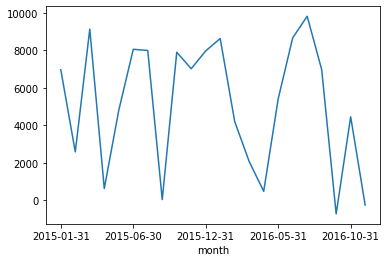

In [78]:
unstacked.loc['Clothing'].dropna().plot()

> [note]
> Ve starších verzích matplotlib/Notebooku je potřeba integraci pro kreslení grafů zapnout pomocí „magické” zkratky IPythonu:
> ```python
> import matplotlib
> 
> %matplotlib inline
> ```

Jste-li v příkazové řádce, napřed použij `plot()` a potom se na graf buď podívete, nebo ho uložte:

```python
# Setup
import matplotlib.pyplot

# Plot
unstacked.loc['Clothing'].plot()
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('graph.png')
```

Funkce `show` a `savefig` pracují s „aktuálním” grafem – typicky posledním, který se vykreslil. Pozor na to, že funkce `savefig` aktuální graf zahodí; před dalším `show` nebo `savefig` je potřeba ho vykreslit znovu.

V kombinaci s dalšími funkcemi `Series` a `DataFrame` umožňují grafy získat o datech rychlý přehled:

<AxesSubplot:xlabel='month'>

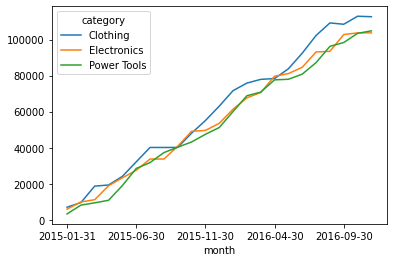

In [79]:
# Jak se postupně vyvíjely zisky z oblečení?
# `.T` udělá transpozici tabulky (vymění řádky a sloupce)
# `cumsum()` spočítá průběžný součet po sloupcích
unstacked.T.fillna(0).cumsum().plot()

<AxesSubplot:xlabel='category'>

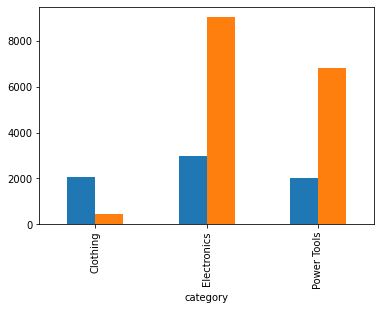

In [80]:
# Jak si proti sobě stály jednotlivé kategorie v březnu, dubnu a květnu 2016?
unstacked.loc[:, '2016-03':'2016-05'].plot.bar(legend=False)

Další informace jsou, jak už to bývá, [v dokumentaci](http://pandas.pydata.org/pandas-docs/version/0.19.0/visualization.html).

## Groupby

Často používaná operace pro zjednodušení tabulky je `groupby`, která sloučí dohromady řádky se stejnou hodnotou v některém sloupci a sloučená data nějak agreguje.

In [81]:
data.head()

,month,category,sales
0,2015-01-31,Electronics,5890
1,2015-01-31,Power Tools,3242
2,2015-01-31,Clothing,6961
3,2015-02-28,Electronics,3969
4,2015-02-28,Power Tools,4866


Samotný výsledek `groupby()` je jen objekt:

In [82]:
data.groupby('category')

... na který musíme zavolat příslušnou agregující funkci. Tady je například součet částek podle kategorie:

In [83]:
data.groupby('category').sum()

,sales
category,
Clothing,112701
Electronics,103742
Power Tools,104859


Nebo počet záznamů:

In [84]:
data.groupby('category').count()

,month,sales
category,,
Clothing,22,22
Electronics,22,22
Power Tools,23,23


Groupby umí agregovat podle více sloupců najednou (i když u našeho příkladu nedává velký smysl):

In [85]:
data.groupby(['category', 'month']).sum().head()

sales
category month            
Clothing 2015-01-31   6961
         2015-02-28   2578
         2015-03-31   9131
         2015-04-30    618
         2015-05-31   4796

Chceme-li aplikovat více funkcí najednou, předáme jejich seznam metodě `agg`. Časté funkce lze předat jen jménem, jinak předáme funkci či metodu přímo:

In [86]:
data.groupby('category').agg(['mean', 'median', sum, pandas.Series.kurtosis])

sales                          
                    mean  median     sum      kurt
category                                          
Clothing     5122.772727  6185.5  112701 -1.298035
Electronics  4715.545455  4294.5  103742 -1.353210
Power Tools  4559.086957  3769.0  104859 -1.044767

Případně použijeme zkratku pro základní analýzu:

In [87]:
g = data.groupby('month')
g.describe()

sales                                                            \
           count         mean          std     min     25%     50%     75%   
month                                                                        
2015-01-31   3.0  5364.333333  1914.414880  3242.0  4566.0  5890.0  6425.5   
2015-02-28   3.0  3804.333333  1152.853995  2578.0  3273.5  3969.0  4417.5   
2015-03-31   3.0  3900.333333  4529.891978  1281.0  1285.0  1289.0  5210.0   
2015-04-30   3.0  3250.000000  3895.490855   618.0  1012.5  1407.0  4566.0   
2015-05-31   3.0  5792.000000  2069.341200  4409.0  4602.5  4796.0  6483.5   
2015-06-30   3.0  7241.333333  2747.220656  4180.0  6116.0  8052.0  8772.0   
2015-07-31   3.0  5836.333333  2388.415653  3267.0  4760.0  6253.0  7121.0   
2015-08-31   1.0  5534.000000          NaN  5534.0  5534.0  5534.0  5534.0   
2015-09-30   3.0  3371.000000  3542.417960    31.0  1513.5  2996.0  5041.0   
2015-10-31   3.0  6367.666667  3002.029702  2909.0  5402.5  7896.0  8097.0   
2015-11-30   3.0  3917.666667  3273.148688   494.0  2368.5  4243.0  5629.5   
2015-12-31   3.0  5225.333333  2377.587082  3769.0  3853.5  3938.0  5953.5   
2016-01-31   3.0  8453.666667   536.431108  7852.0  8239.5  8627.0  8754.5   
2016-02-29   3.0  6417.666667  2290.170372  4194.0  5242.0  6290.0  7529.5   
2016-03-31   3.0  2345.666667   537.738164  2012.0  2035.5  2059.0  2512.5   
2016-04-30   3.0  5439.000000  4444.797408   471.0  3639.0  6807.0  7923.0   
2016-05-31   3.0  2391.333333  2675.235566   314.0   882.0  1450.0  3430.0   
2016-06-30   3.0  5012.000000  3178.877632  2858.0  3186.5  3515.0  6089.0   
2016-07-31   3.0  8232.000000  1732.765131  6382.0  7439.5  8497.0  9157.0   
2016-08-31   3.0  5452.333333  4539.188621   349.0  3659.0  6969.0  8004.0   
2016-09-30   3.0  3569.333333  5183.962802  -735.0   692.0  2119.0  5721.5   
2016-10-31   3.0  3487.333333  2247.644174   919.0  2683.5  4448.0  4771.5   
2016-11-30   3.0   385.333333   887.008643  -259.0  -120.5    18.0   707.5   

                    
               max  
month               
2015-01-31  6961.0  
2015-02-28  4866.0  
2015-03-31  9131.0  
2015-04-30  7725.0  
2015-05-31  8171.0  
2015-06-30  9492.0  
2015-07-31  7989.0  
2015-08-31  5534.0  
2015-09-30  7086.0  
2015-10-31  8298.0  
2015-11-30  7016.0  
2015-12-31  7969.0  
2016-01-31  8882.0  
2016-02-29  8769.0  
2016-03-31  2966.0  
2016-04-30  9039.0  
2016-05-31  5410.0  
2016-06-30  8663.0  
2016-07-31  9817.0  
2016-08-31  9039.0  
2016-09-30  9324.0  
2016-10-31  5095.0  
2016-11-30  1397.0

A perlička nakonec – agregovat se dá i podle sloupců, které nejsou v tabulce. Následující kód rozloží data na slabé, průměrné a silné měsíce podle toho, kolik jsme v daném měsíci vydělali celých tisícikorun, a zjistí celkový zisk ze slabých, průměrných a silných měsíců:

In [88]:
bin_size = 10000
by_month = data.groupby('month').sum()
by_thousands = by_month.groupby(by_month['sales'] // bin_size * bin_size).agg(['count', 'sum'])
by_thousands

sales        
      count     sum
sales              
0         5   30651
10000    15  218870
20000     3   71781

<AxesSubplot:xlabel='sales'>

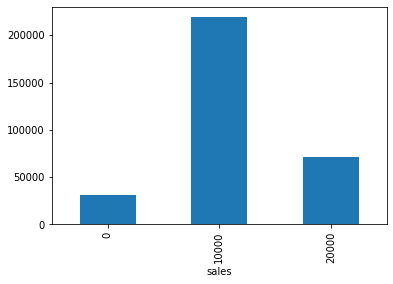

In [89]:
by_thousands[('sales', 'sum')].plot.bar()